In [112]:
import numpy as np
import pandas as pd
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
#import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

In [2]:
data=pd.read_csv('xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [4]:
print(data.shape)

(480, 17)


In [5]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [6]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


<AxesSubplot:>

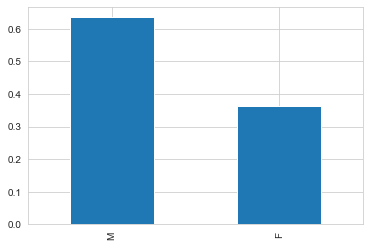

In [8]:
print('Percentage',data.gender.value_counts(normalize=True))
data.gender.value_counts(normalize=True).plot(kind='bar')

In [9]:
data['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Lybia            6
Iran             6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
Lybia          0.012500
Iran           0.012500
USA            0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<AxesSubplot:>

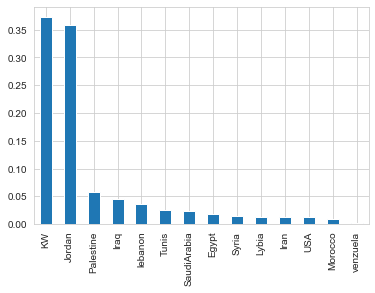

In [10]:
print('Percentage',data.NationalITy.value_counts(normalize=True))
data.NationalITy.value_counts(normalize=True).plot(kind='bar')

In [11]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Tunis            9
Egypt            9
Lybia            6
Syria            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Tunis          0.018750
Egypt          0.018750
Lybia          0.012500
Syria          0.012500
Iran           0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<AxesSubplot:>

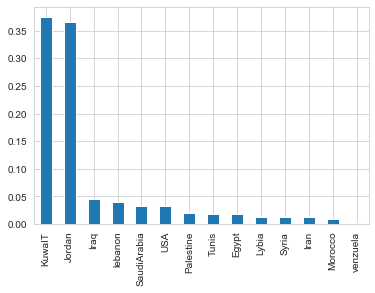

In [12]:
print('Percentage',data.PlaceofBirth.value_counts(normalize=True))
data.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

In [13]:
data['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

Percentage MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


<AxesSubplot:>

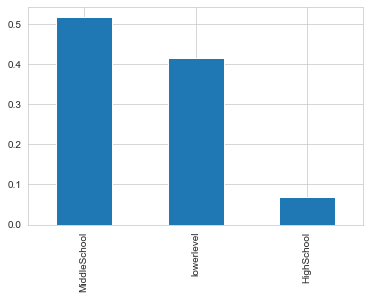

In [14]:
print('Percentage',data.StageID.value_counts(normalize=True))
data.StageID.value_counts(normalize=True).plot(kind='bar')

In [15]:
data['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<AxesSubplot:>

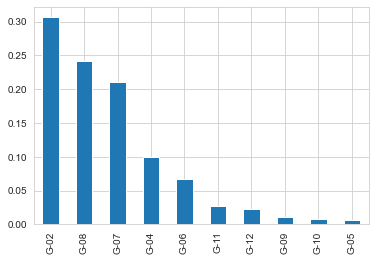

In [16]:
print('Percentage',data.GradeID.value_counts(normalize=True))
data.GradeID.value_counts(normalize=True).plot(kind='bar')

In [17]:
data['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<AxesSubplot:>

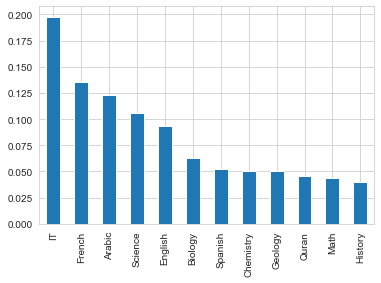

In [18]:
print('Percentage',data.Topic.value_counts(normalize=True))
data.Topic.value_counts(normalize=True).plot(kind='bar')

In [19]:
data['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

Percentage F    0.510417
S    0.489583
Name: Semester, dtype: float64


<AxesSubplot:>

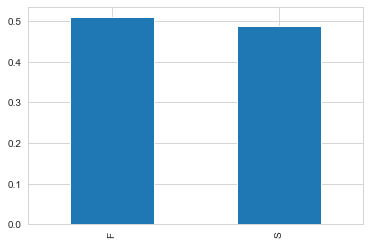

In [20]:
print('Percentage',data.Semester.value_counts(normalize=True))
data.Semester.value_counts(normalize=True).plot(kind='bar')

In [21]:
data['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

Percentage Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


<AxesSubplot:>

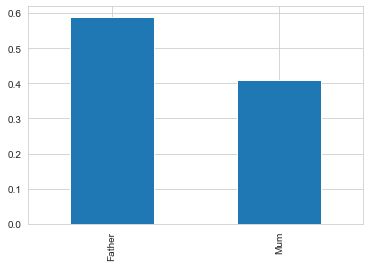

In [22]:
print('Percentage',data.Relation.value_counts(normalize=True))
data.Relation.value_counts(normalize=True).plot(kind='bar')

In [23]:
data['raisedhands'].value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
73     1
66     1
28     1
83     1
Name: raisedhands, Length: 82, dtype: int64

In [24]:
#print('Parcentage',df.raisedhands.value_counts(normalize=True))
#df.raisedhands.value_counts(normalize=True).plot(kind='bar')
color_brewer = ['#41B5A3','#FFAF87','#FF8E72','#ED6A5E','#377771','#E89005','#C6000D','#000000','#05668D','#028090','#9FD35C',
                '#02C39A','#F0F3BD','#41B5A3','#FF6F59','#254441','#B2B09B','#EF3054','#9D9CE8','#0F4777','#5F67DD','#235077','#CCE4F9','#1748D1',
                '#8BB3D6','#467196','#F2C4A2','#F2B1A4','#C42746','#330C25']
fig = {
  "data": [
    {
      "values": data["raisedhands"].value_counts().values,
      "labels": data["raisedhands"].value_counts().index,
      "domain": {"x": [0, .95]},
      "name": "Raisedhands Parcentage",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie",
      "marker": {"colors": [i for i in reversed(color_brewer)]},
      "textfont": {"color": "#FFFFFF"}
    }],
  "layout": {
        "title":"Raisedhands Parcentage",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Raisedhands Parcentage",
                "x": 0.47,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')

In [25]:
data['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

Parcentage Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


<AxesSubplot:>

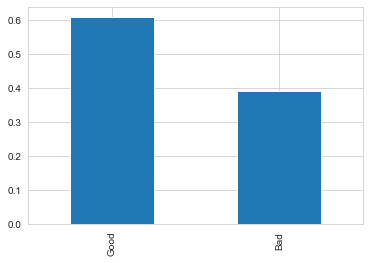

In [26]:
print('Parcentage',data.ParentschoolSatisfaction.value_counts(normalize=True))
data.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')

In [27]:
data['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Parcentage Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


<AxesSubplot:>

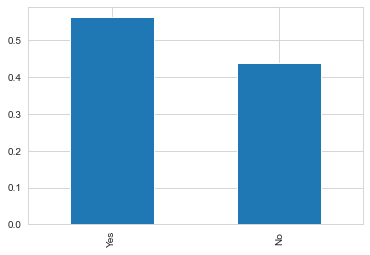

In [28]:
print('Parcentage',data.ParentAnsweringSurvey.value_counts(normalize=True))
data.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

In [29]:
data['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Parcentage Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


<AxesSubplot:>

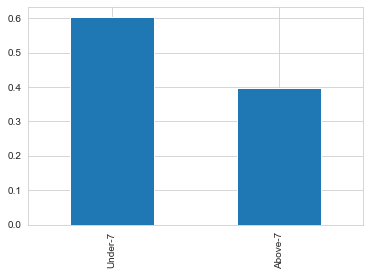

In [30]:
print('Parcentage',data.StudentAbsenceDays.value_counts(normalize=True))
data.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar')

In [31]:
data['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Parcentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<AxesSubplot:>

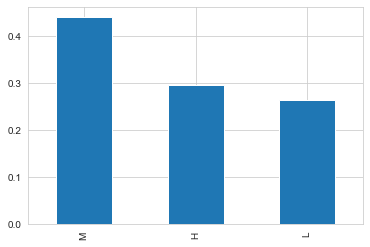

In [32]:
print('Parcentage',data.Class.value_counts(normalize=True))
data.Class.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='Semester', ylabel='count'>

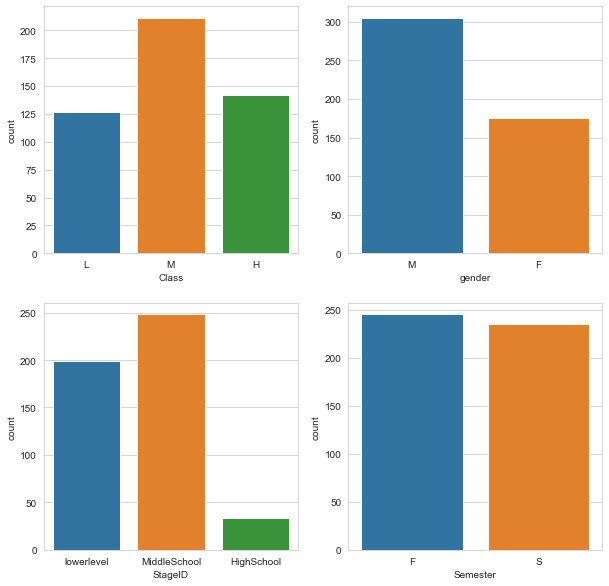

In [33]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

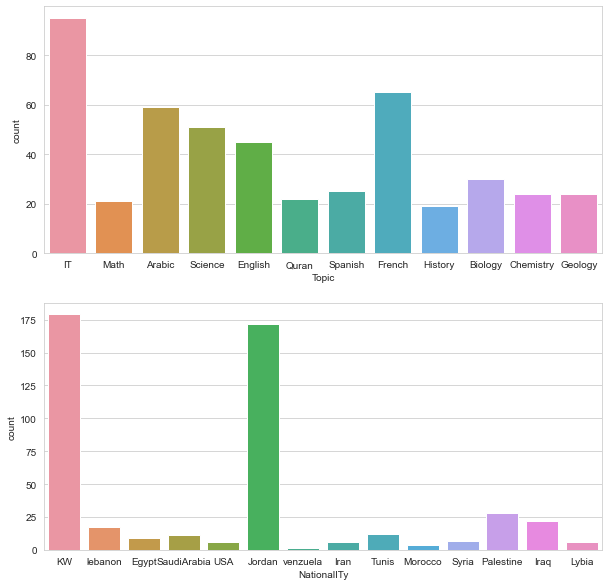

In [34]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

<AxesSubplot:xlabel='gender', ylabel='count'>

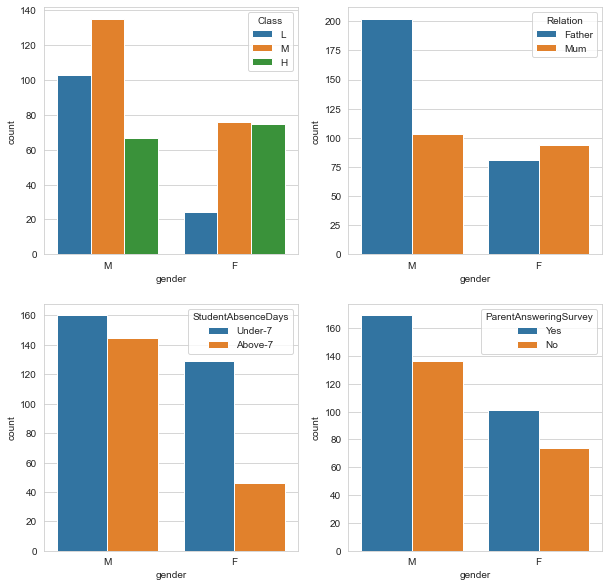

In [35]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

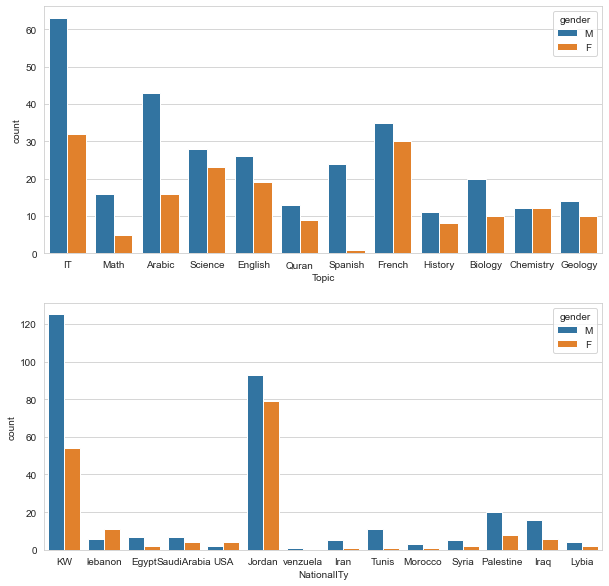

In [36]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2)

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

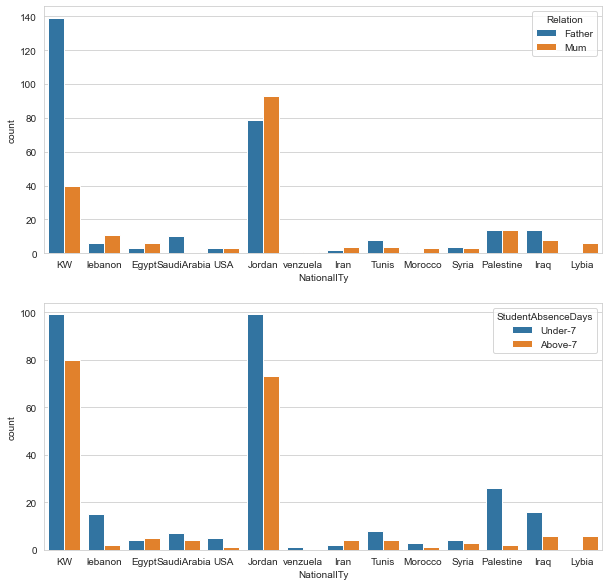

In [37]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='NationalITy', hue='Relation', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=data, ax=axis2)

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

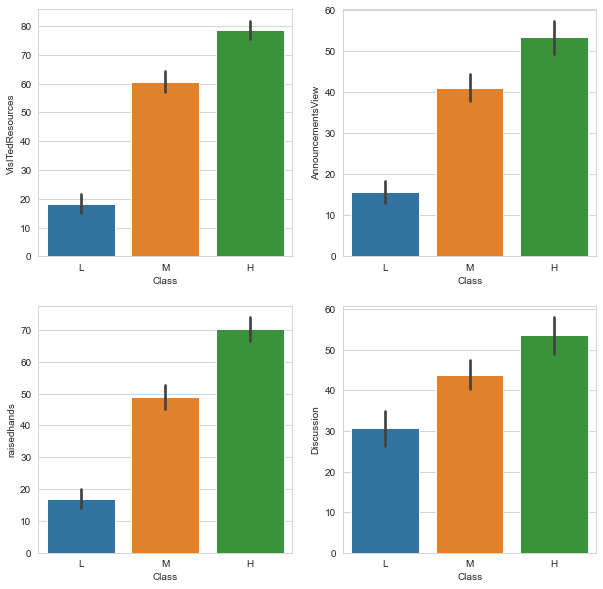

In [38]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

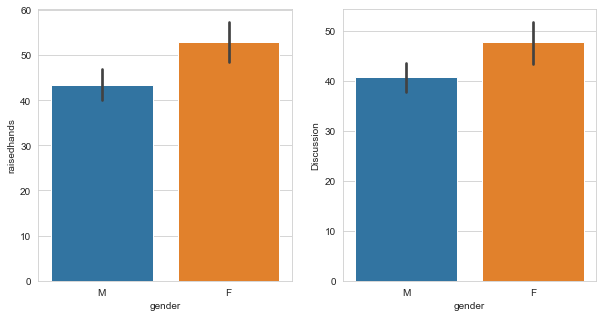

In [39]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='gender', y='raisedhands', data=data, ax=axis1)
sns.barplot(x='gender', y='Discussion', data=data, ax=axis2)

<AxesSubplot:xlabel='gender', ylabel='raisedhands'>

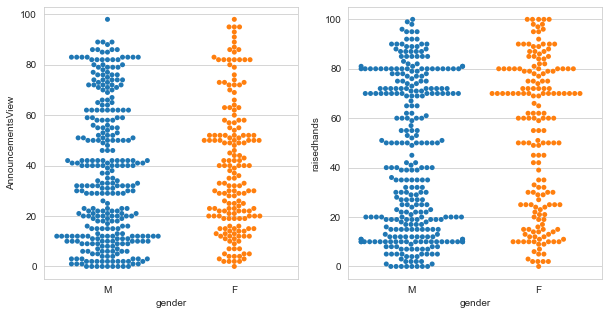

In [40]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.swarmplot(x='gender', y='AnnouncementsView', data=data, ax=axis1)
sns.swarmplot(x='gender', y='raisedhands', data=data, ax=axis2)

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

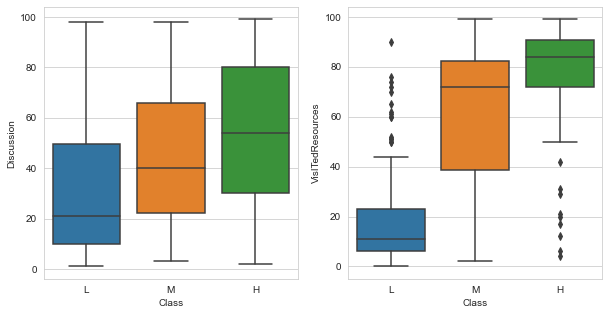

In [41]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axis1)
sns.boxplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axis2)

<AxesSubplot:xlabel='Semester', ylabel='AnnouncementsView'>

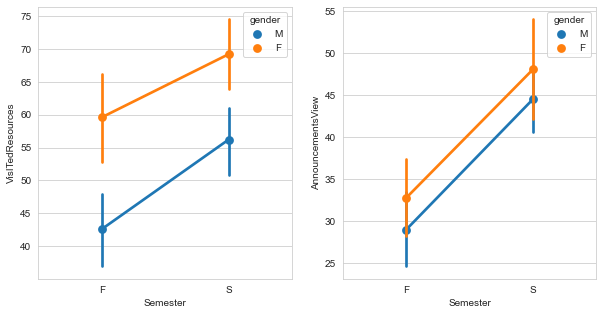

In [42]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Discussion'>

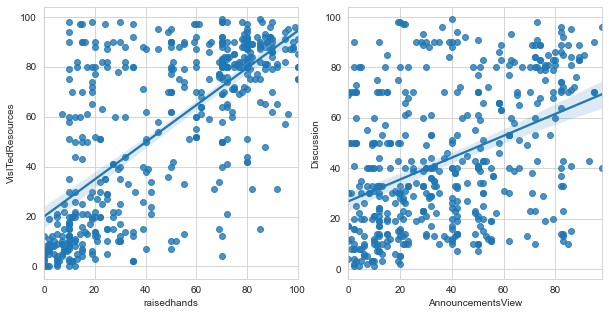

In [43]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.regplot(x='raisedhands', y='VisITedResources', data=data, ax=axis1)
sns.regplot(x='AnnouncementsView', y='Discussion', data=data, ax=axis2)

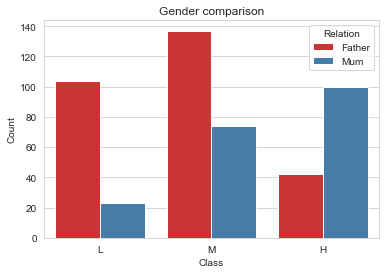

In [44]:
plot = sns.countplot(x='Class', hue='Relation', data=data, order=['L', 'M', 'H'], palette='Set1')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

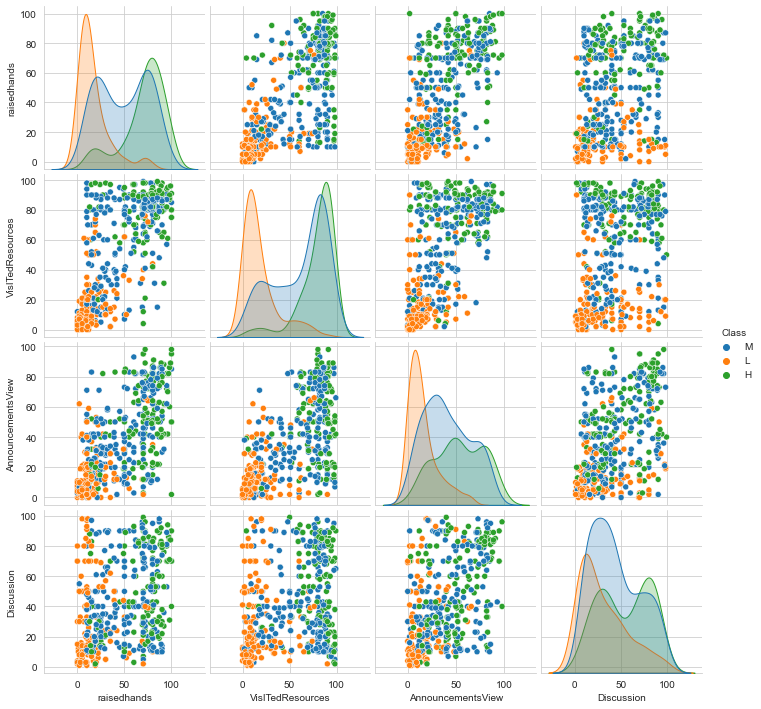

In [45]:
sns.pairplot(data,hue='Class')

Name: 
Type: Graph
Number of nodes: 16
Number of edges: 26
Average degree:   3.2500


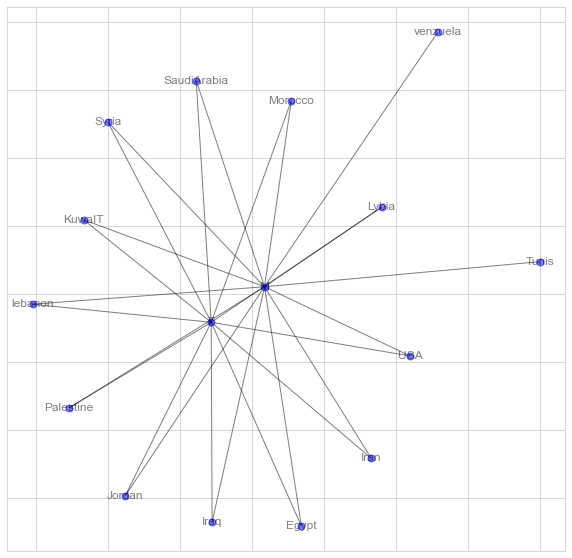

In [46]:
import networkx as nx

g= nx.Graph()
g = nx.from_pandas_edgelist(data,source='gender',target='PlaceofBirth')
print (nx.info(g))


plt.figure(figsize=(10,10)) 
nx.draw_networkx(g,with_labels=True,node_size=50, alpha=0.5, node_color="blue")
plt.show()

**Machine learning algorithm applying**

**1.Gender Encoding**

In [51]:
Features = data.drop('gender',axis=1)
Target = data['gender']
label = preprocessing.LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

**2.Semester Encoding**

In [53]:
Features = data.drop('Semester',axis=1)
Target = data['Semester']
label = preprocessing.LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

**3.ParentsAnsweringSurveyEncoding**

In [55]:
Features = data.drop('ParentAnsweringSurvey',axis=1)
Target = data['ParentAnsweringSurvey']
label = preprocessing.LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

**4.Relation Encoding**

In [58]:
Features = data.drop('Relation',axis=1)
Target = data['Relation']
label = preprocessing.LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

**5.ParentsschollSatisfaction Encoding**

In [60]:
Features = data.drop('ParentschoolSatisfaction',axis=1)
Target = data['ParentschoolSatisfaction']
label = preprocessing.LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

**6.StudentAbsenceDays Encoding**

In [62]:
Features = data.drop('StudentAbsenceDays',axis=1)
Target = data['StudentAbsenceDays']
label = preprocessing.LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

**7.Class Encoding**

In [63]:
Features = data.drop('Class',axis=1)
Target = data['Class']
label = preprocessing.LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

**Test and Train Data Split**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

**Logistic Regression Model**

In [108]:
Logit_Model = LogisticRegression(solver='lbfgs',max_iter=3000)
Logit_Model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [109]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [110]:
print(Prediction)

['L' 'M' 'L' 'L' 'M' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'H' 'M'
 'H' 'M' 'H' 'H' 'L' 'L' 'H' 'L' 'M' 'M' 'H' 'L' 'M' 'H' 'L' 'M' 'M' 'M'
 'L' 'M' 'H' 'L' 'M' 'M' 'H' 'M' 'H' 'L' 'M' 'L' 'M' 'L' 'H' 'H' 'M' 'M'
 'M' 'L' 'M' 'L' 'L' 'M' 'L' 'H' 'M' 'M' 'M' 'H' 'L' 'L' 'H' 'M' 'H' 'H'
 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'H' 'M' 'M' 'L' 'M' 'M' 'H' 'M' 'H'
 'L' 'M' 'M' 'H' 'H' 'H']


In [94]:
print(Score)

0.8229166666666666


In [95]:
print(Report)

              precision    recall  f1-score   support

           H       0.87      0.77      0.82        35
           L       0.81      0.95      0.88        22
           M       0.79      0.79      0.79        39

    accuracy                           0.82        96
   macro avg       0.82      0.84      0.83        96
weighted avg       0.83      0.82      0.82        96



***XGBoost***

In [151]:
#xgb_param = self.get_xgb_params()
#xgb_param['num_class']=3
#xgb = XGBClassifier(max_depth=10, learning_rate=0.1, num_class=1, n_estimators=100,seed=10,use_label_encoder=False)
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)

[23:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [146]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           H       0.93      0.77      0.84        35
           L       0.79      1.00      0.88        22
           M       0.79      0.79      0.79        39

    accuracy                           0.83        96
   macro avg       0.84      0.86      0.84        96
weighted avg       0.84      0.83      0.83        96



In [147]:
print(accuracy_score(y_test,xgb_pred))

0.8333333333333334


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

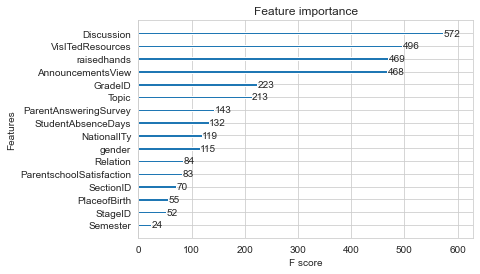

In [148]:
plot_importance(xgb)